In [39]:
%matplotlib inline

from datetime import datetime
from datetime import time
from pytz import timezone
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [77]:
df = pd.read_csv('alert button-1.csv')
df = df.sort('timestamp')

print(datetime.fromtimestamp(int(df.timestamp.min())).strftime('%Y-%m-%d %H:%M:%S %a'))
print(datetime.fromtimestamp(int(df.timestamp.max())).strftime('%Y-%m-%d %H:%M:%S %a'))

datetime.fromtimestamp(int(df.timestamp.min())).day

2016-01-25 03:00:17 Mon
2016-02-01 02:59:43 Mon


/Users/maddness/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


25

In [114]:
def part_of_day(hour):
    if 0 <= hour <= 6: return 'night'
    else: return 'day'
#     if 7 <= hour <= 22: return 'day'
#     if hour == 23: return 'night'

    
def get_hour(timestamp):    
    return datetime.fromtimestamp(int(timestamp)).time().hour

def get_date(timestamp):    
    return datetime.fromtimestamp(int(timestamp)).day


df['hour'] = df.timestamp.map(get_hour)
df['day'] = df.timestamp.map(get_date)
df['segment'] = df.hour.map(part_of_day)

dfa = df[df.device_id == 31296]


[25 26 27 29 30 31  1]


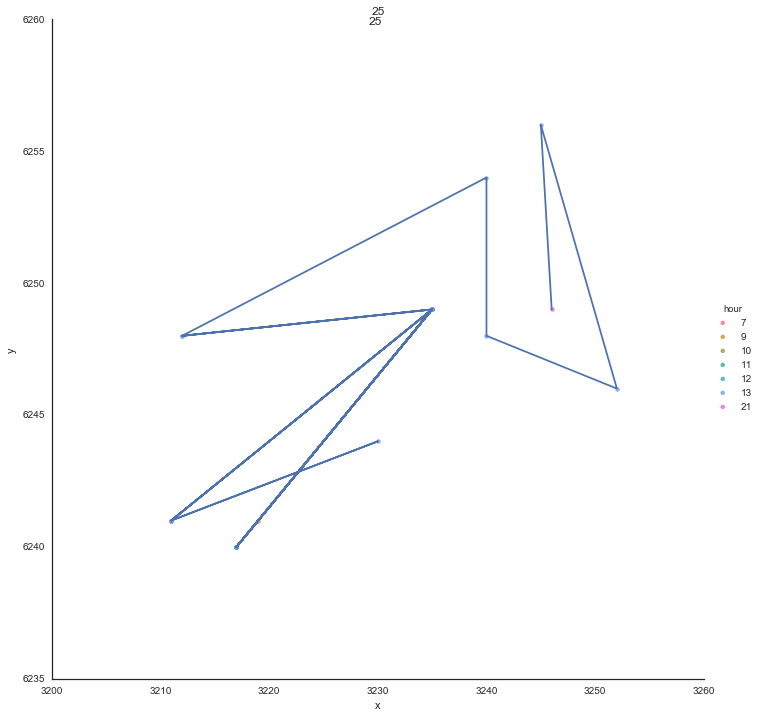

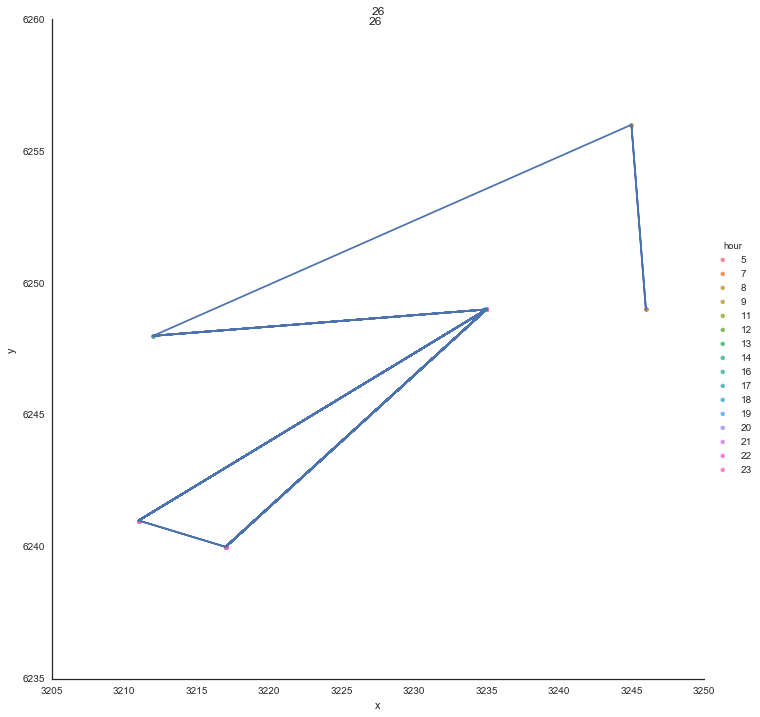

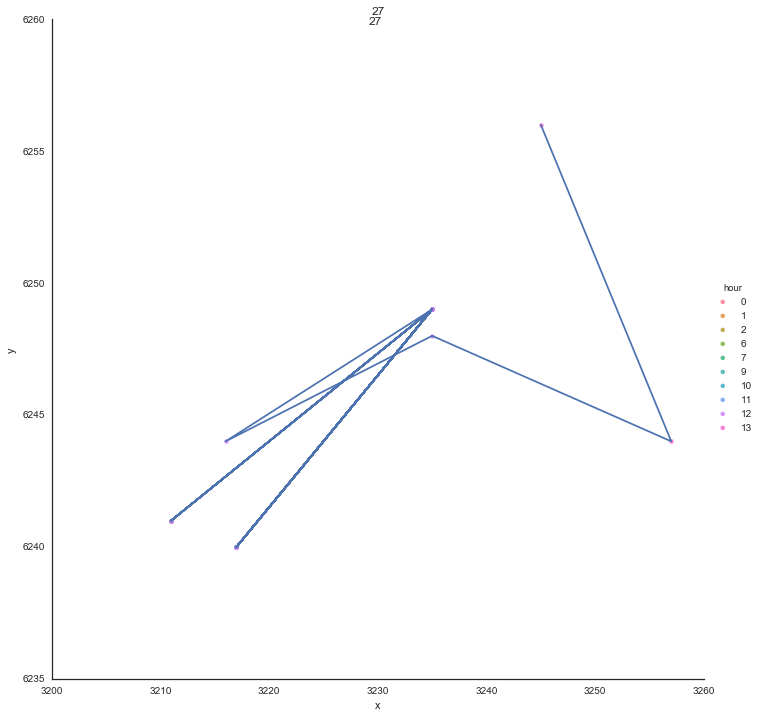

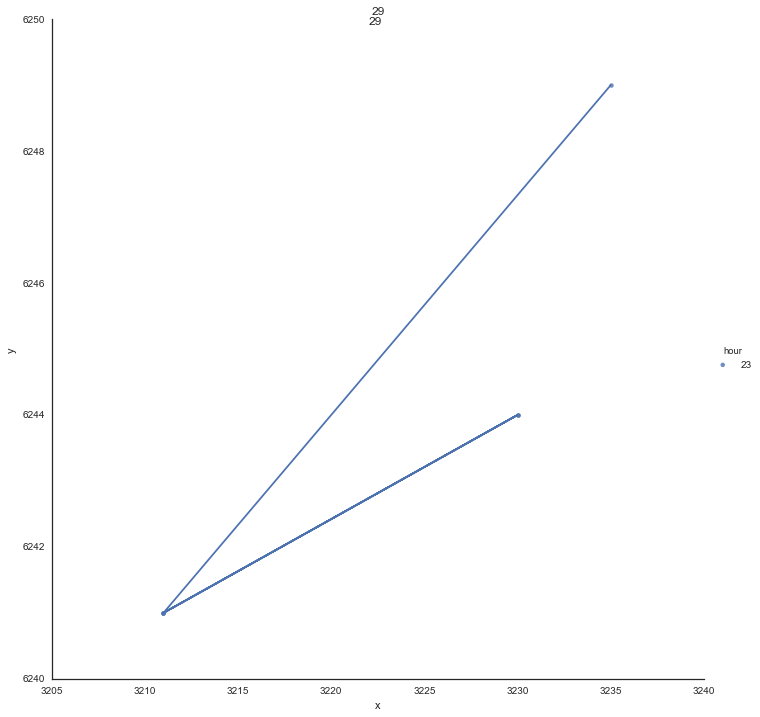

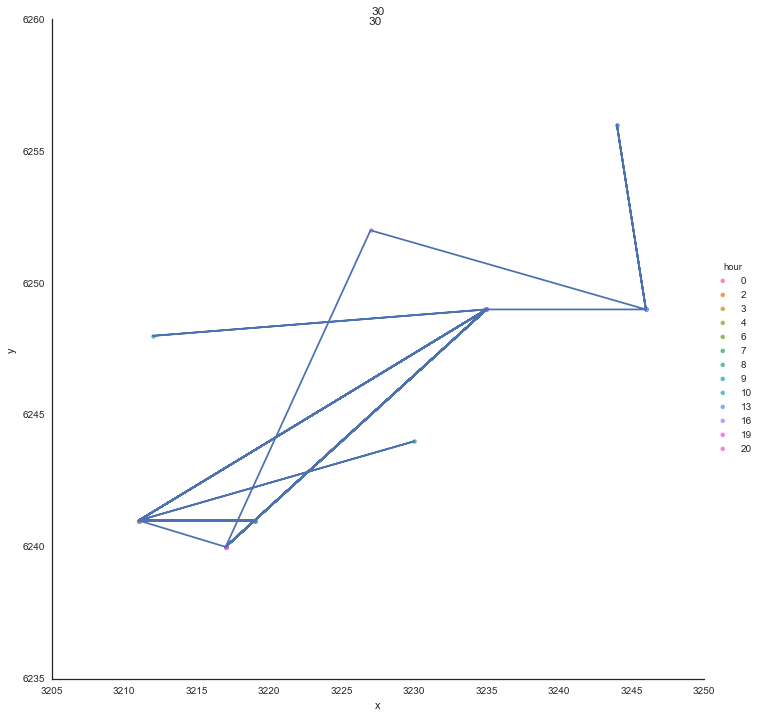

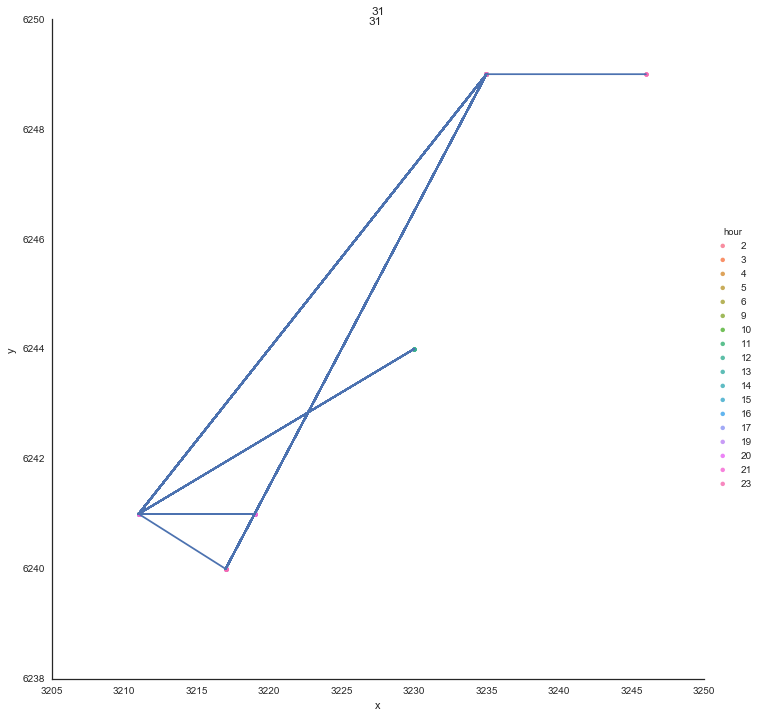

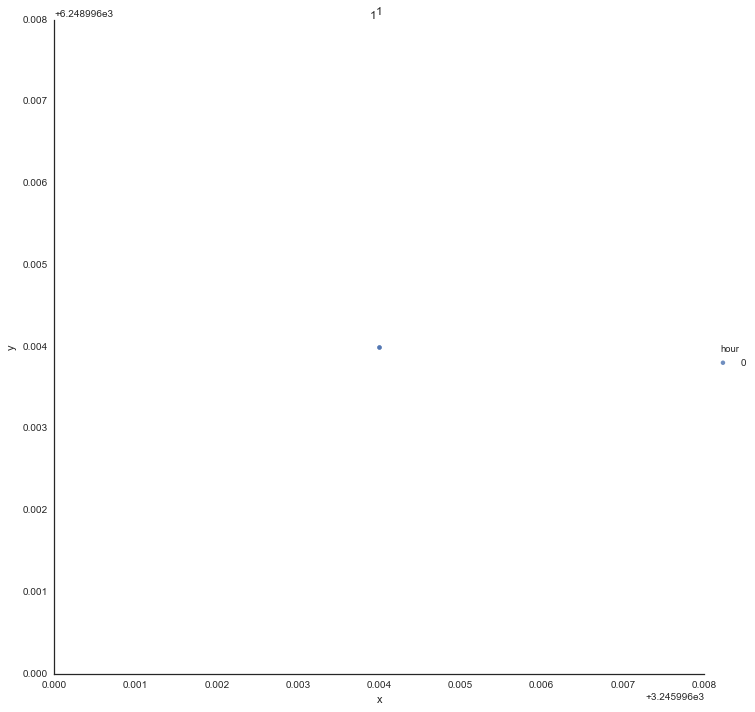

In [119]:
sns.set(style='white')
# df1 = df[(df.y > 0) & (df.x < 60000)]
df1 = df[df.device_id == 26617]
days = df1.day.unique()
print(days)
for i in days:
    dft = df1[df1.day == i]
    
    img = sns.lmplot(x='x', y = 'y', hue = 'hour', data=dft, fit_reg=False, size=10)
    img.fig.suptitle(i)
    
    plt.plot(dft.x, dft.y)
    plt.title(str(i))
    plt.show()
    
    

In [6]:
people = df.device_id.drop_duplicates()

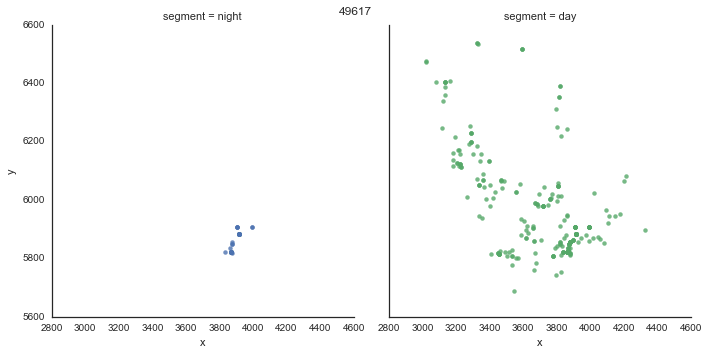

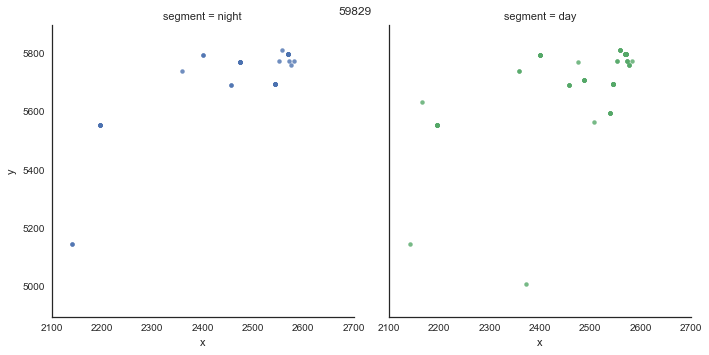

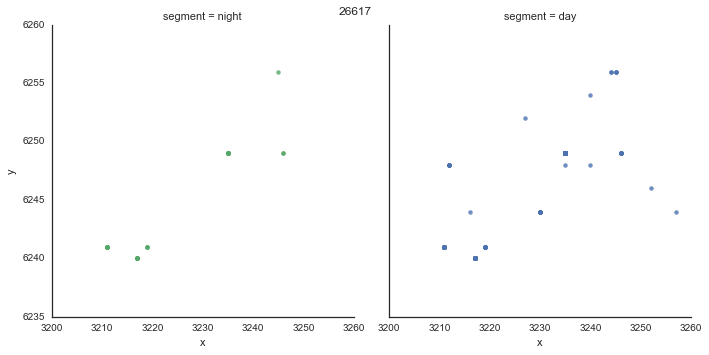

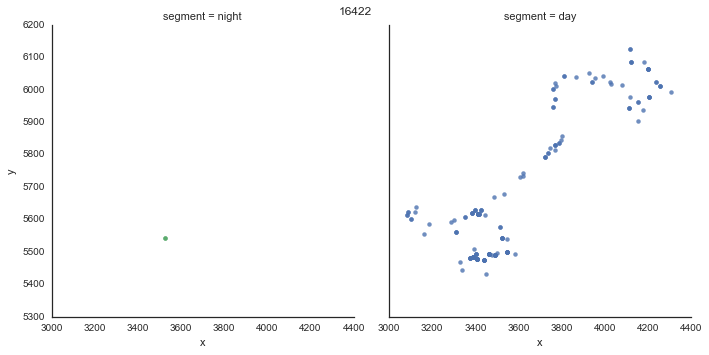

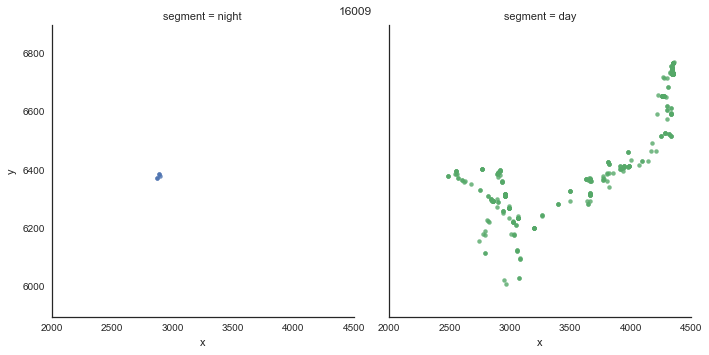

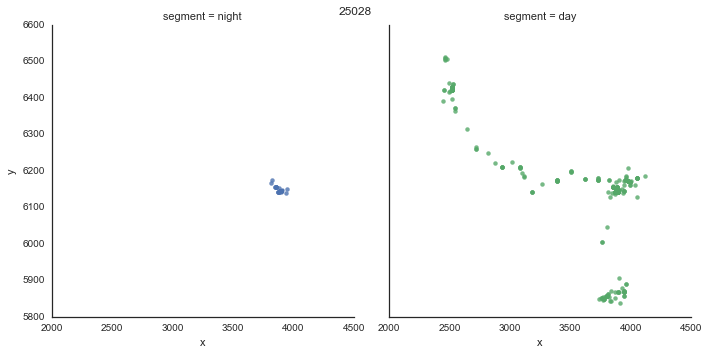

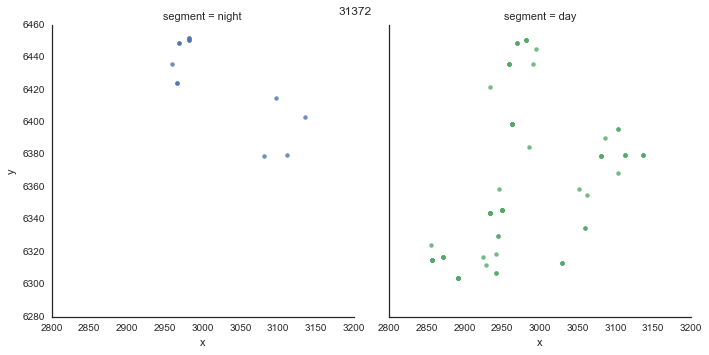

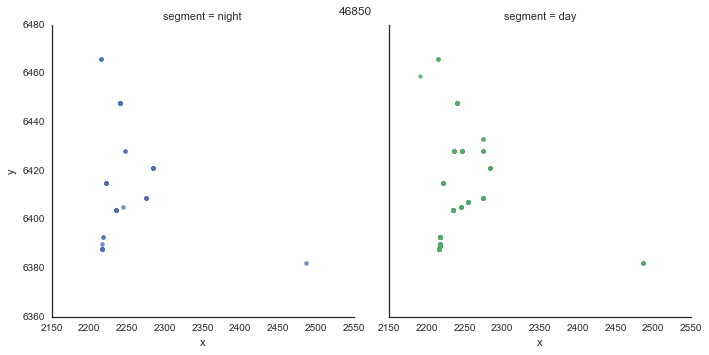

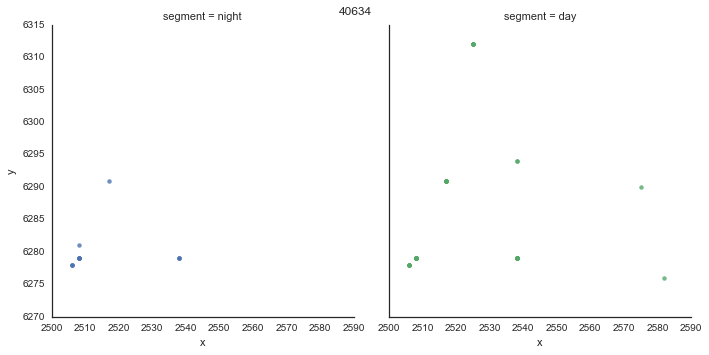

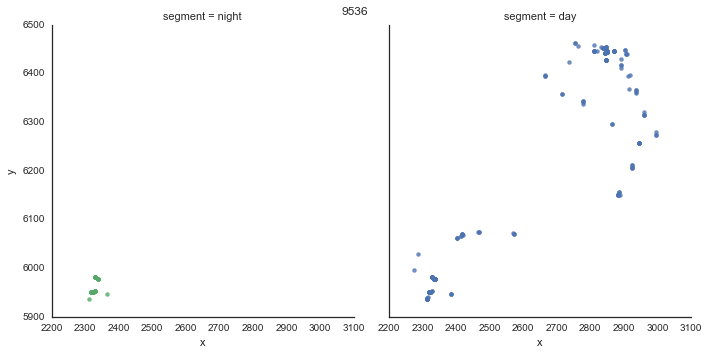

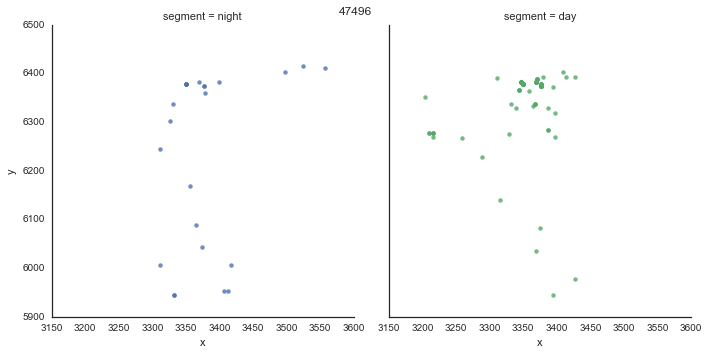

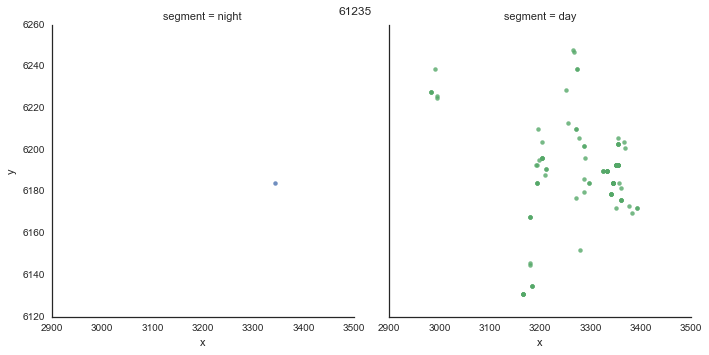

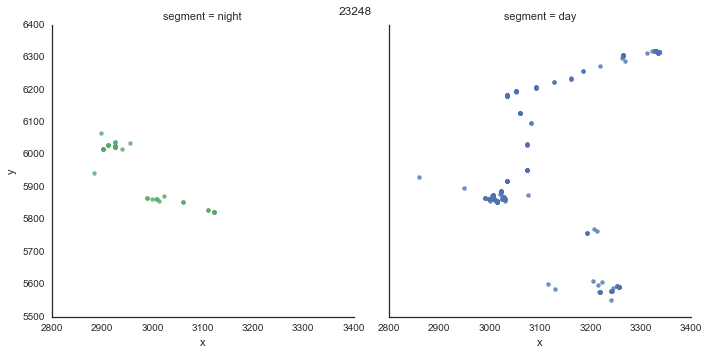

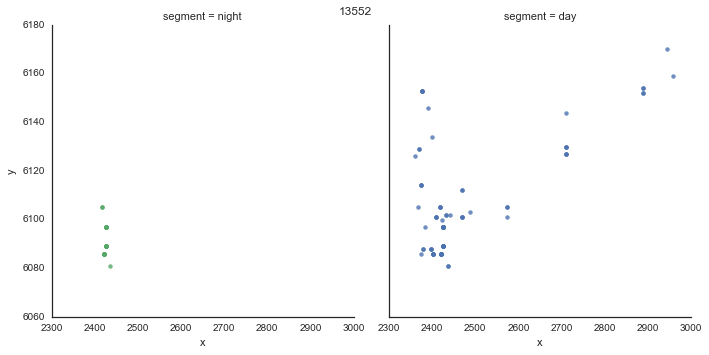

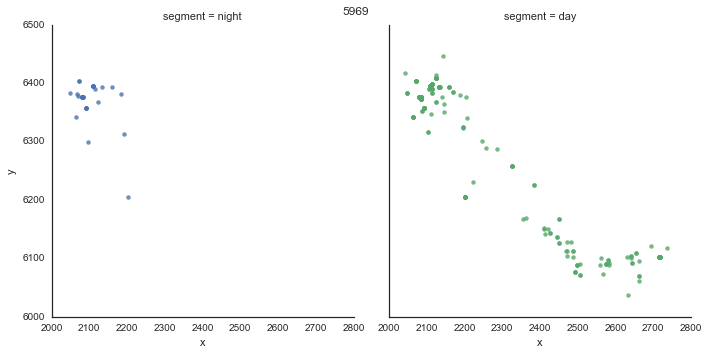

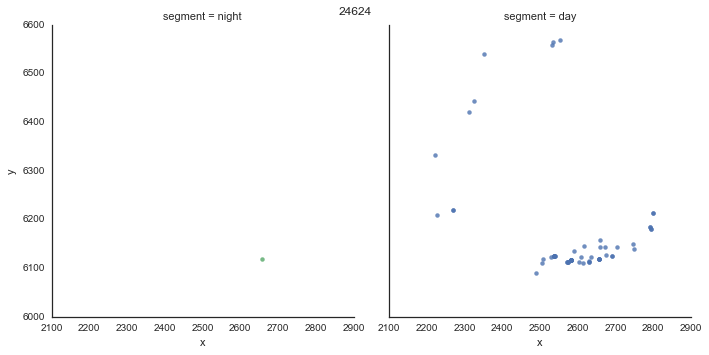

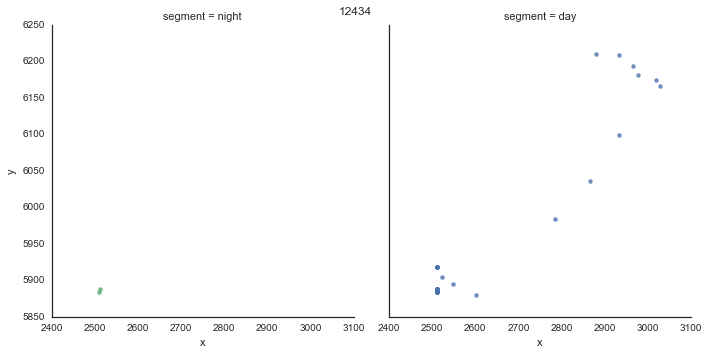

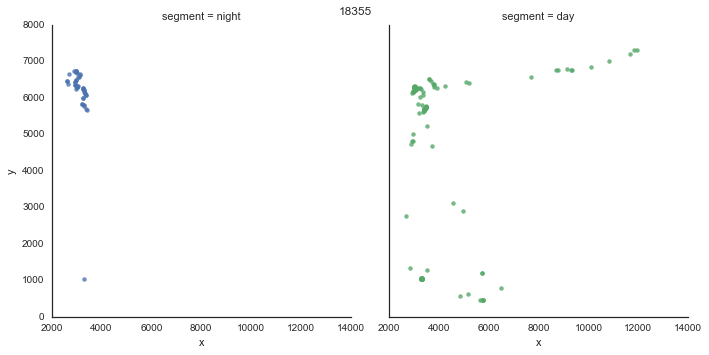

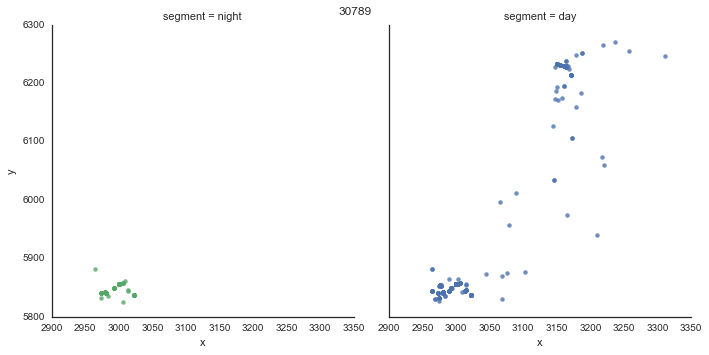

In [105]:
for i in people[21:40]:
    df1 = df[df.device_id == i]
#     sns.lmplot(x='x', y = 'y', hue='segment', col='segment', col_order= ['night', 'day'], data=df1, fit_reg=False)
#     print(i)
    img = sns.lmplot(x='x', y = 'y', hue='segment', col='segment',col_order= ['night', 'day'],data=df1, fit_reg=False)

#     img = sns.jointplot(x='x', y = 'y', data=df1, stat_func=None)
    img.fig.suptitle(i)
#     fig = img.fig()
#     fig.savefig(i)
#     fig.clf()
    

In [ ]:
for i in people:
    plt.plot(df.x[df.device_id == i], df.y[df.device_id == i])
    heatmap, xedges, yedges = np.histogram2d(df.x[df.device_id == i], df.y[df.device_id == i], bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap, extent=extent)
    plt.show()